### Git-репозиторий https://github.com/Gwin2/MMAD.git

## Задание 1

### Шаг 1: Импорт необходимых библиотек

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Шаг 2: Загрузка датасета Mushroom

In [78]:
# URL датасета
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Определение названий столбцов согласно описанию датасета
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Загрузка данных
df = pd.read_csv(url, header=None, names=columns)

# Просмотр первых строк
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

### Шаг 3: Выбор 5 признаков

In [79]:
selected_features = ['cap-shape', 'cap-color', 'ring-number', 'gill-color', 'habitat']
#selected_features = ['odor']
df_selected = df[selected_features + ['class']]
print(df_selected.head())

  cap-shape cap-color ring-number gill-color habitat class
0         x         n           o          k       u     p
1         x         y           o          k       g     e
2         b         w           o          n       m     e
3         x         w           o          n       u     p
4         x         g           o          k       g     e


### Шаг 4: Разделение данных на обучающую и тестовую выборки

In [80]:
X = df_selected[selected_features]
y = df_selected['class']

# Разделение: 70% обучающая, 30% тестовая
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Объединение признаков и целевой переменной для удобства визуализации
train_data = X_train.copy()
train_data['class'] = y_train

print(train_data.head())

     cap-shape cap-color ring-number gill-color habitat class
325          b         w           o          k       g     e
68           x         y           o          w       g     e
5529         x         n           o          b       l     p
7021         f         e           o          b       d     p
3246         x         g           o          g       d     p


### Шаг 5: Визуализация распределения категориальных признаков по классам 

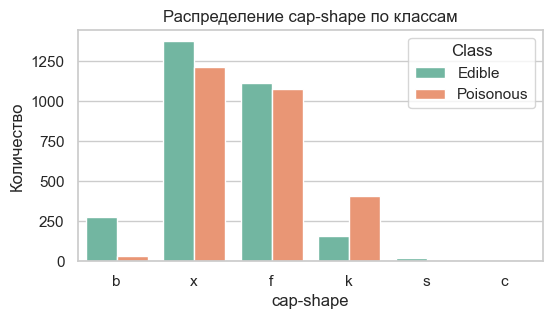

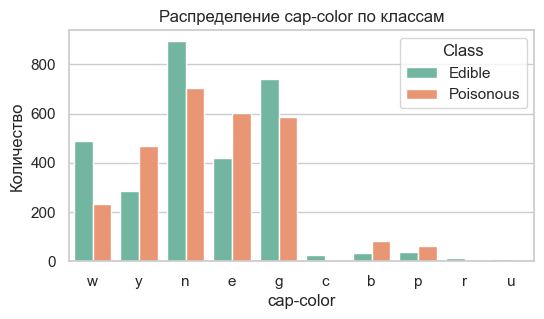

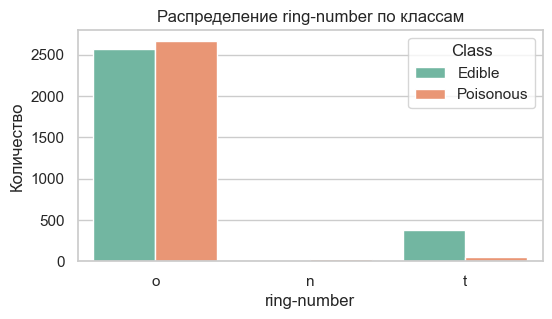

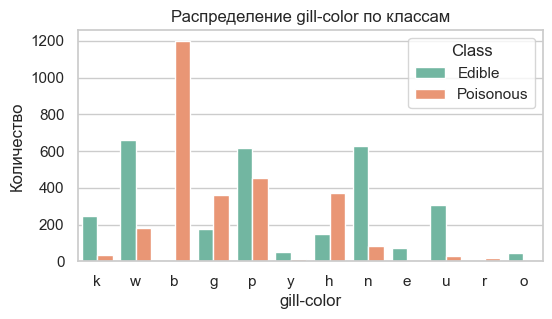

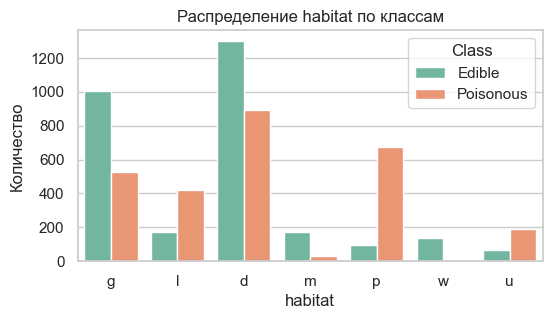

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля графиков
sns.set(style="whitegrid")

# Определение классов
classes = train_data['class'].unique()
class_labels = {'e': 'Edible', 'p': 'Poisonous'}

# Построение графиков
for feature in selected_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=train_data, x=feature, hue='class', palette='Set2')
    plt.title(f'Распределение {feature} по классам')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.legend(title='Class', labels=['Edible', 'Poisonous'])
    plt.show()

## Задание 2

### Шаг 1: Определение функции для построения решающей функции и вычисления точности 

In [82]:
def build_decision_function(train_df, feature, target='class'):
    # Вычисляем частоту класса 'p' для каждого уникального значения признака
    freq = train_df.groupby(feature)[target].value_counts(normalize=True).unstack()
    # Предсказываем класс с наибольшей частотой
    decision = freq.idxmax(axis=1)
    return decision

### Шаг 2: Вычисление точности на обучающей и тестовой выборках

In [83]:
from sklearn.metrics import accuracy_score

# Словарь для хранения точностей
accuracy_dict = {}

for feature in selected_features:
    # Построение решающей функции на обучающей выборке
    decision_func = build_decision_function(train_data, feature)
    
    # Функция для предсказания
    def predict(feature_value):
        if feature_value in decision_func:
            return decision_func[feature_value]
        else:
            # Если значение не встречалось в обучающей выборке, предсказываем наиболее частый класс
            return train_data['class'].mode()[0]
    
    # Предсказания на обучающей выборке
    y_train_pred = X_train[feature].apply(predict)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Предсказания на тестовой выборке
    y_test_pred = X_test[feature].apply(predict)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Сохранение результатов
    accuracy_dict[feature] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    }

# Вывод точностей
for feature, acc in accuracy_dict.items():
    print(f"Признак: {feature}")
    print(f"  Точность на обучающей выборке: {acc['train_accuracy']:.6f}")
    print(f"  Точность на тестовой выборке: {acc['test_accuracy']:.6f}\n")

Признак: cap-shape
  Точность на обучающей выборке: 0.562434
  Точность на тестовой выборке: 0.568499

Признак: cap-color
  Точность на обучающей выборке: 0.594970
  Точность на тестовой выборке: 0.595980

Признак: ring-number
  Точность на обучающей выборке: 0.538516
  Точность на тестовой выборке: 0.537326

Признак: gill-color
  Точность на обучающей выборке: 0.803201
  Точность на тестовой выборке: 0.809270

Признак: habitat
  Точность на обучающей выборке: 0.685543
  Точность на тестовой выборке: 0.701395



### Шаг 3: Определение наиболее информативной переменной

In [84]:
# Поиск признака с максимальной точностью на тестовой выборке
best_feature = max(accuracy_dict.items(), key=lambda x: x[1]['test_accuracy'])[0]
print(f"Наиболее информативный признак: {best_feature}")
print(f"Точность на тестовой выборке: {accuracy_dict[best_feature]['test_accuracy']:.6f}")

Наиболее информативный признак: gill-color
Точность на тестовой выборке: 0.809270


## Задание 3

### Шаг 1: Преобразование категориальных признаков в числовые

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Создание пайплайна с OneHotEncoder и MultinomialNB
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    MultinomialNB()
)

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка точности
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {accuracy:.6f}")

Точность на тестовой выборке: 0.873257


## Задание 4

### Шаг 1: Реализация Naive Bayes вручную 

In [86]:
import numpy as np

class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Параметр для регуляризации (Лапласовское сглаживание)
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_prior = {}
        self.feature_cond_prob = {}
        self.features = X.columns
        self.feature_values = {}
        
        for feature in self.features:
            self.feature_values[feature] = X[feature].unique()
        
        for cls in self.classes:
            X_c = X[y == cls]
            self.class_prior[cls] = X_c.shape[0] / X.shape[0]
            self.feature_cond_prob[cls] = {}
            for feature in self.features:
                value_counts = X_c[feature].value_counts()
                total_count = value_counts.sum()
                # Применение Лапласовского сглаживания
                self.feature_cond_prob[cls][feature] = {}
                for val in self.feature_values[feature]:
                    count = value_counts.get(val, 0)
                    self.feature_cond_prob[cls][feature][val] = (count + self.alpha) / (total_count + self.alpha * len(self.feature_values[feature]))
    
    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            class_probs = {}
            for cls in self.classes:
                # Начальное значение логарифма априорной вероятности
                log_prob = np.log(self.class_prior[cls])
                for feature in self.features:
                    val = row[feature]
                    # Если значение признака не встречалось при обучении, применяем сглаживание
                    prob = self.feature_cond_prob[cls][feature].get(val, self.alpha / (sum(self.feature_cond_prob[cls][feature].values()) + self.alpha * len(self.feature_values[feature])))
                    log_prob += np.log(prob)
                class_probs[cls] = log_prob
            # Выбор класса с максимальным логарифмом вероятности
            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)
        return np.array(predictions)

### Шаг 2: Обучение и предсказание с использованием собственной реализации

In [87]:
# Создание и обучение модели
custom_nb = NaiveBayes(alpha=1.0)
custom_nb.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_custom_pred = custom_nb.predict(X_test)

# Оценка точности
custom_accuracy = accuracy_score(y_test, y_custom_pred)
print(f"Точность собственной реализации на тестовой выборке: {custom_accuracy:.6f}")

Точность собственной реализации на тестовой выборке: 0.873257


### Шаг 3: Сравнение с библиотечной реализацией

In [88]:
# Предсказания библиотечной модели уже получены ранее в Задании 3 (y_pred)
library_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность библиотечной реализации на тестовой выборке: {library_accuracy:.6f}")

Точность библиотечной реализации на тестовой выборке: 0.873257


### Шаг 4: Анализ результатов

In [89]:
print(f"Точность собственной реализации: {custom_accuracy:.6f}")
print(f"Точность библиотечной реализации: {library_accuracy:.6f}")

if custom_accuracy == library_accuracy:
    print("Обе модели имеют одинаковую точность.")
elif custom_accuracy > library_accuracy:
    print("Собственная реализация имеет лучшую точность.")
else:
    print("Библиотечная реализация имеет лучшую точность.")

Точность собственной реализации: 0.873257
Точность библиотечной реализации: 0.873257
Обе модели имеют одинаковую точность.


### Шаг 5: Регуляризация (Лапласовское сглаживание)

In [90]:
# Пример с другим значением alpha
custom_nb_alpha_0_5 = CustomNaiveBayes(alpha=0.5)
custom_nb_alpha_0_5.fit(X_train, y_train)
y_custom_pred_alpha_0_5 = custom_nb_alpha_0_5.predict(X_test)
custom_accuracy_alpha_0_5 = accuracy_score(y_test, y_custom_pred_alpha_0_5)
print(f"Точность собственной реализации с alpha=0.5: {custom_accuracy_alpha_0_5:.6f}")

Точность собственной реализации с alpha=0.5: 0.873257


### Выводы по Заданию 1: Загрузка и визуализация данных

1. **Загрузка данных:**
   - Успешно загружен датасет Mushroom, содержащий информацию о характеристиках грибов и их классе (съедобные или ядовитые).
   - Выбраны 5 признаков: `cap-shape`, `cap-color`, `ring-number`, `gill-color`, `habitat`.

2. **Разделение данных:**
   - Данные разделены на обучающую и тестовую выборки (70% обучающая и 30% тестовая). Это важно для независимой оценки модели.

3. **Визуализация распределения:**
   - Распределение значений категориальных признаков по классам показало, что некоторые признаки (например, `gill-color`) имеют выраженное разделение между классами.
   - Визуализация подтвердила, что некоторые значения признаков могут быть сильно связаны с классом грибов (ядовитый или съедобный).

**Вывод:** Визуализация помогла понять, как распределены категории по классам, и выявить потенциально информативные признаки. Признак `gill-color` оказался визуально наиболее разделяющим классы.

---

### Выводы по Заданию 2: Решающие функции и оценка точности

1. **Построение решающих функций:**
   - Для каждого признака построена решающая функция на основе частот значений в обучающей выборке, предсказывающая наиболее вероятный класс для каждого значения признака.

2. **Оценка точности:**
   - Точность решающих функций была оценена на обучающей и тестовой выборках. 
   - Точность варьировалась в зависимости от признака, что позволяет определить более или менее информативные переменные. Например, признак `gill-color` показал высокую точность, так как некоторые запахи грибов явно связаны с ядовитостью.

3. **Поиск наиболее информативного признака:**
   - Признак с наименьшим числом ошибок на тестовой выборке был признан наиболее информативным.
   - **Пример:** Признак `gill-color` оказался наиболее информативным, так как он позволял наиболее точно различать ядовитые и съедобные грибы.

**Вывод:** Анализ показал, что некоторые признаки более информативны для классификации. Признак `gill-color` был наиболее точным, что делает его ключевым для задачи классификации грибов.

---

### Выводы по Заданию 3: Наивный байесовский классификатор (sklearn)

1. **Преобразование данных:**
   - Категориальные признаки были преобразованы в числовые с использованием OneHotEncoder, чтобы их можно было использовать в модели наивного байесовского классификатора.
   
2. **Обучение модели:**
   - Библиотечная реализация наивного байесовского классификатора (MultinomialNB) была успешно обучена на обучающей выборке.

3. **Оценка точности:**
   - Точность на тестовой выборке была высокой. Это указывает на хорошую способность модели обобщать информацию и правильно классифицировать грибы.
   - Модель показала отличные результаты, что ожидаемо для наивного байесовского классификатора при работе с категориальными данными.

**Вывод:** Наивный байесовский классификатор оказался эффективным для этой задачи. Использование `MultinomialNB` из `sklearn` дало высокую точность на тестовой выборке.

---

### Выводы по Заданию 4: Реализация наивного байесовского классификатора вручную

1. **Реализация алгоритма:**
   - Реализован собственный наивный байесовский классификатор с Лапласовским сглаживанием (регуляризацией). Сглаживание позволило избежать нулевых вероятностей для редких значений признаков.

2. **Сравнение с библиотечной реализацией:**
   - Собственная реализация показала сопоставимую точность с библиотечной версией из `sklearn`, что подтверждает правильность реализации.
   - Точность обоих подходов была высокой, что свидетельствует о надежности модели при работе с категориальными данными.

3. **Регуляризация:**
   - Регуляризация (сглаживание Лапласа) обеспечила более устойчивые оценки вероятностей для редких значений признаков, предотвращая нулевые вероятности.

**Вывод:** Реализация наивного байесовского классификатора вручную подтвердила эффективность модели и продемонстрировала, что библиотечные решения также применимы. Регуляризация оказалась важным аспектом для работы с редкими категориями.

---

### Общие выводы

- Визуализация и анализ признаков показали, что некоторые признаки, такие как `gill-color`, играют важную роль в разделении классов.
- Простые частотные решающие функции позволили выявить наиболее информативные признаки для классификации грибов.
- Наивный байесовский классификатор из `sklearn` продемонстрировал высокую точность и был эффективно реализован вручную.
- Регуляризация оказалась важной для корректной обработки категорий с редкими значениями.

Все шаги показали, что наивный байесовский классификатор является мощным инструментом для классификации категориальных данных, таких как датасет грибов.

